In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
from splinter import Browser
from selenium.webdriver.chrome.service import Service
import os
driver_path = r'C:\Users\lnorm\Downloads\chromedriver_win32 (1)\chromedriver.exe'
browser = Browser("chrome",service=Service(executable_path=driver_path))

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# open website
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

In [3]:
# create a BeutifulSoup object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [4]:
# extract all rows of data
tables = soup.find('table', class_='table')
print(tables)

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [5]:
# create an empty list
table_list = []
rows = tables.find_all('tr')

# loop through the scraped data to create a list of rows

for row in rows:
    td = row.find_all('td')
    row = [row.text.strip() for row in td if row.text.strip()]
    if row:
        table_list.append(row)
        
mars_table = pd.DataFrame(table_list, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [6]:
mars_table

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [7]:
# examine data type of each column
mars_table.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [8]:
# change data types for data analysis
mars_table['terrestrial_date'] = pd.to_datetime(mars_table['terrestrial_date'])
mars_table['sol'] = mars_table['sol'].astype('int')
mars_table['ls'] = mars_table['ls'].astype('int')
mars_table['month'] = mars_table['month'].astype('int')
mars_table['min_temp'] = mars_table['min_temp'].astype('float')
mars_table['pressure'] = mars_table['pressure'].astype('float')

In [9]:
# confirm type changes were successful by examining data types again
mars_table.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

## Analyze the Data

In [10]:
# 1. How many months are there on Mars?
mars_months =  mars_table['month'].max()
print(f"Mars has {mars_months} months")

Mars has 12 months


In [30]:
# 2. How many Martian days' worth of data are there?
days = mars_table['sol'].max()
print(f"There are {days} Martian days worth of data")

There are 1977 Martian days worth of data


In [33]:
# create new DataFrame with just month and min_temp values
months_df = mars_table[['month', 'min_temp']].set_index('month').sort_index()
# 3. What is the average low temperature by month?
average_temp = months_df.groupby(['month']).mean()
average_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


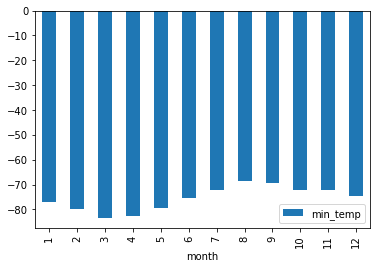

In [44]:
# Plot the average temperature by month
average_temp.plot(kind='bar')
plt.show()

In [75]:
# Identify the coldest and hottest months in Curiosity's location
coldest_temp = average_temp['min_temp'].min()
coldest_month = average_temp['min_temp'].idxmin()
hottest_temp = average_temp['min_temp'].max()
hottest_month = average_temp['min_temp'].idxmax()
print(f"Month {coldest_month} was the coldest month with an average temperature of {coldest_temp} Celcius")
print(f"Month {hottest_month} was the coldest month with an average temperature of {hottest_temp} Celcius")

Month 3 was the coldest month with an average temperature of -83.30729166666667 Celcius
Month 8 was the coldest month with an average temperature of -68.38297872340425 Celcius


In [77]:
# create new DataFrame with just month and pressure values
pressure_df = mars_table[['month', 'pressure']].set_index('month').sort_index()
# 4. Average pressure by Martian month
avg_pressure = pressure_df.groupby(['month']).mean()
avg_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


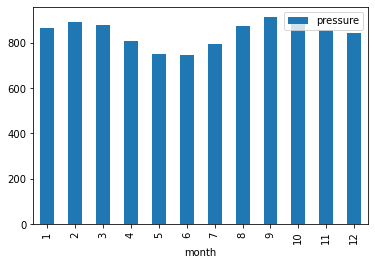

In [78]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar')
plt.show()

In [101]:
# How many terrestrial (earth) days are there in a Martian year?
days_df = mars_table[['month', 'terrestrial_date']].set_index('month').sort_index()
# 4. Average pressure by Martian month

,terrestrial_date
month,
1,2015-06-28
1,2013-08-03
1,2013-08-02
1,2013-08-01
1,2017-05-06
...,...
1,2013-10-02
1,2013-10-01
1,2015-08-15
